Exporatory Data Anaysis

In [ ]:
# Importing Necessary libraries
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
!pip install transformers scikit-learn
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
df.tail()


First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [ ]:
# Print the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



Number of rows: 47692
Number of columns: 2


In [ ]:
# Check for missing values, data types, and basic summary statistics
print("\nSummary information about the dataset:")
print(df.info())


Summary information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None


In [ ]:
# Display basic summary statistics for numerical columns
print("\nBasic summary statistics for numerical columns:")
print(df.describe())


Basic summary statistics for numerical columns:
                                               tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


In [ ]:
# Display unique values in the 'cyberbullying_type' column
print("Unique labels in 'cyberbullying_type' column:")
print(df['cyberbullying_type'].unique())

Unique labels in 'cyberbullying_type' column:
['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']


In [ ]:
# Check for class imbalance
print("\nClass distribution:")
print(df['cyberbullying_type'].value_counts())



Class distribution:
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


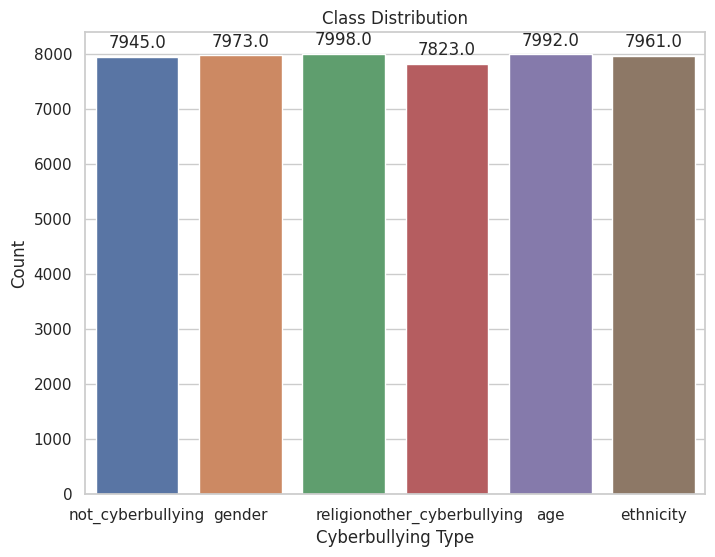

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the class distribution using a bar plot with counts
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cyberbullying_type', data=df)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.show()


Data Preprocessing

In [ ]:
# Create a new dataframe for preprocessed data
df_preprocessed = df.copy()

In [ ]:

# Define the text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+|[^A-Za-z\s]', '', text)
    return text


In [ ]:
# Apply text cleaning function to the tweet_text column
df_preprocessed['cleaned_text'] = df_preprocessed['tweet_text'].apply(clean_text)


In [ ]:
# Tokenization
df_preprocessed['tokenized_text'] = df_preprocessed['cleaned_text'].apply(lambda x: x.split())


In [ ]:

# Lowercasing
df_preprocessed['tokenized_text'] = df_preprocessed['tokenized_text'].apply(lambda x: [word.lower() for word in x])


In [ ]:
# Stopword Removal
stop_words = set(stopwords.words('english'))
df_preprocessed['tokenized_text'] = df_preprocessed['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])


In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df_preprocessed['tokenized_text'] = df_preprocessed['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
# Map the sub-labels to binary labels
label_mapping = {
    'not_cyberbullying': 0,
    'other_cyberbullying': 1,
    'age': 1,  # Assuming 'age' is a type of cyberbullying
    'gender': 1,  # Assuming 'gender' is a type of cyberbullying
    'ethnicity': 1,  # Assuming 'ethnicity' is a type of cyberbullying
    'religion': 1  # Assuming 'religion' is a type of cyberbullying
}


In [ ]:

# Apply label mapping to create a new binary label
df_preprocessed['binary_label'] = df_preprocessed['cyberbullying_type'].apply(lambda x: 1 if x != 'not_cyberbullying' else 0)

In [ ]:
# Create a new column to store the original cyberbullying category
df_preprocessed['original_category'] = df_preprocessed['cyberbullying_type']

In [ ]:
# Display the unique values in the 'binary_label' column
print("\nUnique values in the 'binary_label' column:")
print(df_preprocessed['binary_label'].unique())


Unique values in the 'binary_label' column:
[0 1]


In [ ]:
# Check the class distribution in the new binary label
print("\nClass distribution in 'binary_label':")
print(df_preprocessed['binary_label'].value_counts())


Class distribution in 'binary_label':
1    39747
0     7945
Name: binary_label, dtype: int64


In [ ]:
# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(df_preprocessed[['tweet_text', 'original_category', 'binary_label']].head())


First few rows of the updated DataFrame:
                                          tweet_text  original_category  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   binary_label  
0             0  
1             0  
2             0  
3             0  
4             0  


In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df_preprocessed[df_preprocessed['binary_label'] == 1]
df_minority = df_preprocessed[df_preprocessed['binary_label'] == 0]

# Oversample each minority class separately
df_minority_upsampled = pd.DataFrame()

for category in df_preprocessed['original_category'].unique():
    # Select the minority class for the current category
    df_category_minority = df_minority[df_minority['original_category'] == category]

    # Check if there are instances in the minority class for the current category
    if not df_category_minority.empty:
        # Upsample the current minority class
        df_category_minority_upsampled = resample(
            df_category_minority,
            replace=True,  # Sample with replacement
            n_samples=len(df_majority),  # Match the number of majority class samples
            random_state=42
        )

        # Append the upsampled minority class to the overall upsampled DataFrame
        df_minority_upsampled = pd.concat([df_minority_upsampled, df_category_minority_upsampled])

# Concatenate the majority class DataFrame with the upsampled minority class DataFrame
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_upsampled['binary_label'].value_counts())



Class distribution after oversampling:
1    39747
0    39747
Name: binary_label, dtype: int64


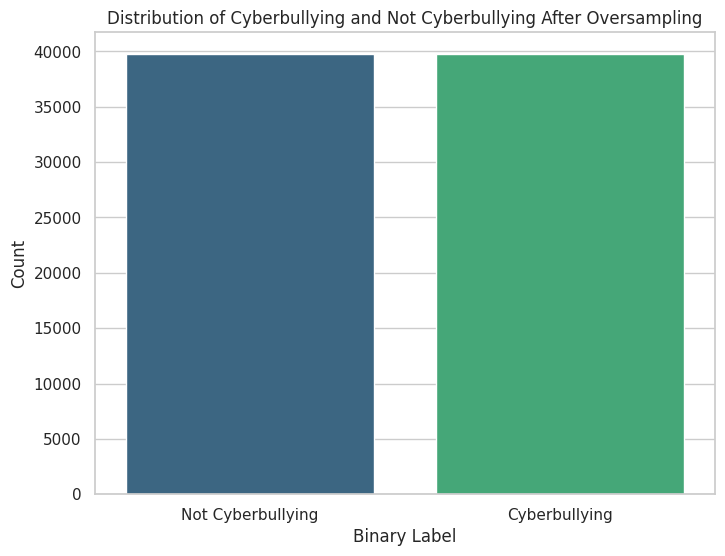

In [ ]:
# Plot the distribution of 'cyberbullying' and 'not_cyberbullying'
plt.figure(figsize=(8, 6))
sns.countplot(x='binary_label', data=df_upsampled, palette='viridis')
plt.title('Distribution of Cyberbullying and Not Cyberbullying After Oversampling')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Cyberbullying', 'Cyberbullying'])
plt.show()


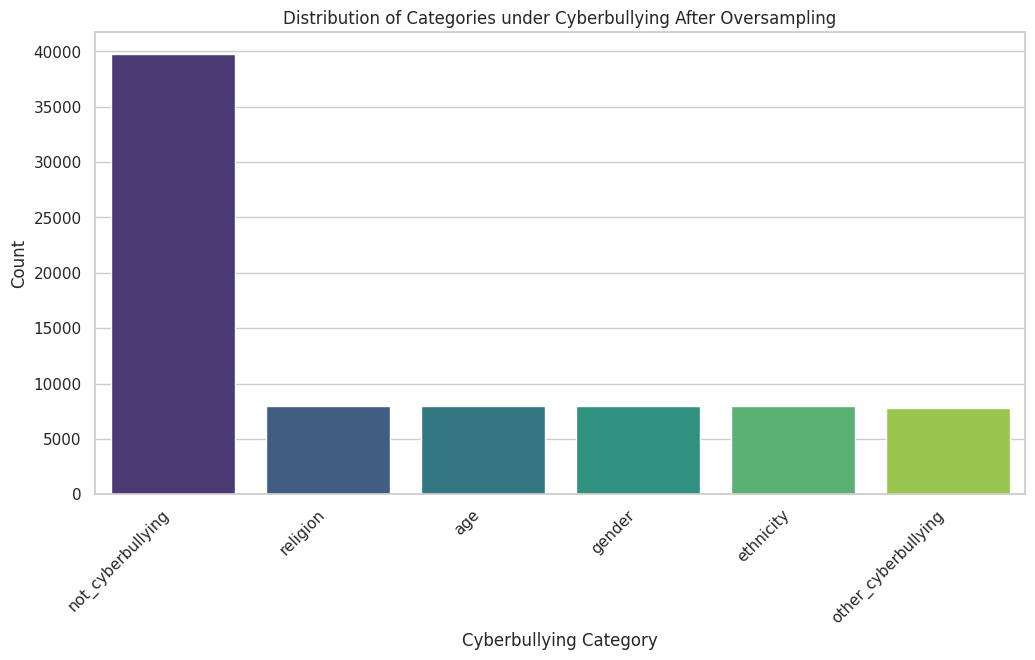

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Plot the distribution of each category
plt.figure(figsize=(12, 6))
sns.countplot(x='original_category', data=df_upsampled, order=df_upsampled['original_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Categories under Cyberbullying After Oversampling')
plt.xlabel('Cyberbullying Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df_upsampled['cleaned_text']
y = df_upsampled['binary_label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (63595,) (63595,)
Testing set shape: (15899,) (15899,)


In [ ]:
# Check for missing values in the training set
missing_values_train = X_train.isnull().sum()
print("Missing values in training set:")
print(missing_values_train)

# Check for missing values in the testing set
missing_values_test = X_test.isnull().sum()
print("\nMissing values in testing set:")
print(missing_values_test)


Missing values in training set:
0

Missing values in testing set:
0




>



Feature Engineering and Model Training



>

>

>

>

>

>

>




>





>






>







>














>







In [ ]:

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Load your data and preprocess it here...

# Fit and transform the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Save the model to a file
joblib.dump(rf_classifier, '/content/drive/My Drive/random_forest_model.joblib', protocol=4)
joblib.dump(tfidf_vectorizer, '/content/drive/My Drive/tfidf_vectorizer.joblib', protocol=4)



Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7936
           1       0.98      0.87      0.92      7963

    accuracy                           0.93     15899
   macro avg       0.93      0.93      0.93     15899
weighted avg       0.93      0.93      0.93     15899


Confusion Matrix:
[[7823  113]
 [1059 6904]]


['/content/drive/My Drive/tfidf_vectorizer.joblib']

In [ ]:
!pip show scikit-learn
!pip show joblib

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
Name: joblib
Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: imbalanced-learn, librosa, mlxtend, music21, nltk, scikit-learn


LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
X_train_padded = pad_sequences(X_train_seq)
X_test_padded = pad_sequences(X_test_seq, maxlen=X_train_padded.shape[1])

# Create the LSTM model
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train_padded.shape[1]))
LSTM_model.add(LSTM(64))
LSTM_model.add(Dense(1, activation='sigmoid'))

# Compile the model
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
LSTM_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = (LSTM_model.predict(X_test_padded) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)


Epoch 1/5
795/795 [==============================] - 898s 1s/step - loss: 0.3393 - accuracy: 0.8496 - val_loss: 0.2860 - val_accuracy: 0.8770
Epoch 2/5
795/795 [==============================] - 846s 1s/step - loss: 0.2132 - accuracy: 0.9106 - val_loss: 0.2580 - val_accuracy: 0.8923
Epoch 3/5
795/795 [==============================] - 843s 1s/step - loss: 0.1570 - accuracy: 0.9359 - val_loss: 0.2779 - val_accuracy: 0.8971
Epoch 4/5
795/795 [==============================] - 845s 1s/step - loss: 0.1273 - accuracy: 0.9486 - val_loss: 0.2723 - val_accuracy: 0.9022
Epoch 5/5
497/497 [==============================] - 52s 104ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.9110006918674131

Confusion Matrix:
[[7717  219]
 [1196 6767]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7936
           1       0.97      0.85      0.91      7963

    accuracy                           0.91     15899
   macro avg       0.92      0.91      0.91     15899
weighted avg       0.92      0.91      0.91     15899



Logistic Regression

In [ ]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8599282973771936

Confusion Matrix:
[[7272  664]
 [1563 6400]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7936
           1       0.91      0.80      0.85      7963

    accuracy                           0.86     15899
   macro avg       0.86      0.86      0.86     15899
weighted avg       0.86      0.86      0.86     15899



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes Classifier

In [ ]:

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predictions on the testing set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8143

Confusion Matrix:
[[6169 1767]
 [1186 6777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      7936
           1       0.79      0.85      0.82      7963

    accuracy                           0.81     15899
   macro avg       0.82      0.81      0.81     15899
weighted avg       0.82      0.81      0.81     15899





>



Stochastic Gradient Classifier

In [ ]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:

# Initialize the Stochastic Gradient Classifier
sgd_classifier = SGDClassifier(random_state=42)

# Train the model
sgd_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8587332536637524

Confusion Matrix:
[[7564  372]
 [1874 6089]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7936
           1       0.94      0.76      0.84      7963

    accuracy                           0.86     15899
   macro avg       0.87      0.86      0.86     15899
weighted avg       0.87      0.86      0.86     15899





>



SVM

In [ ]:

# Create an SVM pipeline with a TF-IDF vectorizer
model = make_pipeline(TfidfVectorizer(), SVC())

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 93.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7936
           1       0.98      0.88      0.93      7963

    accuracy                           0.93     15899
   macro avg       0.94      0.93      0.93     15899
weighted avg       0.94      0.93      0.93     15899





>



Using Ensemble Learning



>



Using Pretrained Model BERT Methods

In [ ]:
# Feature Engineering
df_upsampled['text_length'] = df_upsampled['cleaned_text'].apply(len)
df_upsampled['num_words'] = df_upsampled['tokenized_text'].apply(len)
df_upsampled['num_special_characters'] = df_upsampled['cleaned_text'].apply(lambda x: sum(1 for char in x if char.isalnum()))

# Display the updated DataFrame
print(df_upsampled[['cleaned_text', 'text_length', 'num_words', 'num_special_characters']].head())


                                           cleaned_text  text_length  \
7945  rape is realzvasiyana nema jokes about being d...          152   
7946  You never saw any celebrity say anything like ...          129   
7947   I mean hes gay but he uses gendered slurs and...           63   
7948                                   RT      feminazi           16   
7949  Rape is rape And the fact that I read one post...          266   

      num_words  num_special_characters  
7945         12                     127  
7946         19                     106  
7947          9                      50  
7948          2                      10  
7949         27                     209  


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Tokenize and encode the text data
X_train_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True) for text in X_train]
X_test_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True) for text in X_test]

# Padding to make all sequences of the same length
max_len = max(map(len, X_train_encoded + X_test_encoded))
X_train_padded = [i + [0]*(max_len-len(i)) for i in X_train_encoded]
X_test_padded = [i + [0]*(max_len-len(i)) for i in X_test_encoded]

# Train a logistic regression model on the BERT embeddings
bert_model = LogisticRegression()
bert_model.fit(X_train_padded, y_train)

# Make predictions on the test set
y_pred = bert_model.predict(X_test_padded)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6889741493175672
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73      7936
           1       0.79      0.52      0.63      7963

    accuracy                           0.69     15899
   macro avg       0.71      0.69      0.68     15899
weighted avg       0.71      0.69      0.68     15899



Comparing Accuracies of each Model

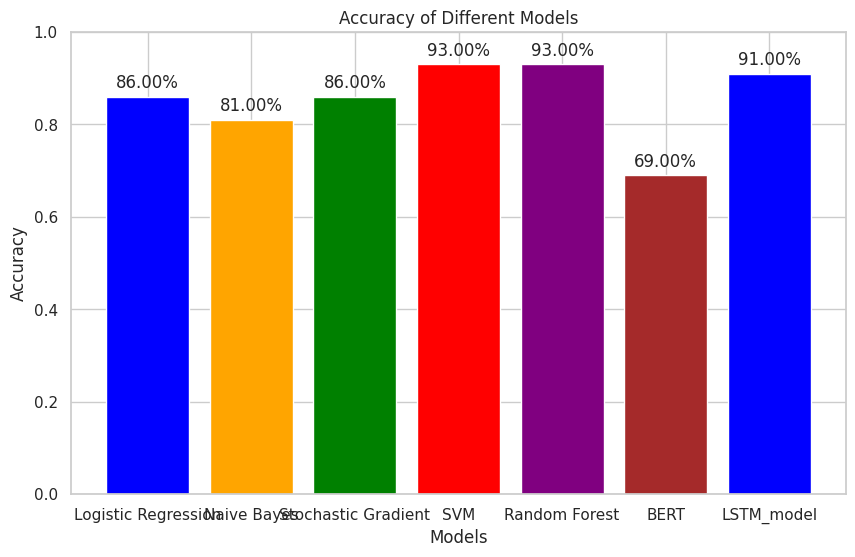

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'Stochastic Gradient', 'SVM', 'Random Forest', 'BERT', 'LSTM_model']

# Corresponding accuracies
accuracies = [0.86, 0.81, 0.86, 0.93, 0.93, 0.69, 0.91]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])  # Set the y-axis limit to represent accuracy percentage

# Display percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom')

plt.show()


Receiver Operating Characteristic Curve(ROC)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample text
sample_text = "How about the old ugly gay guy @! what does he get"

# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+|[^A-Za-z\s]', '', text)
    return text

# Tokenization function
def tokenize_text(text):
    return text.split()

# Lowercasing function
def lowercase_text(tokens):
    return [word.lower() for word in tokens]

# Stopword removal function
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply text cleaning
cleaned_text = clean_text(sample_text)

# Tokenization
tokenized_text = tokenize_text(cleaned_text)

# Lowercasing
lowercased_text = lowercase_text(tokenized_text)

# Stopword removal
stopword_removed_text = remove_stopwords(lowercased_text)

# Lemmatization
lemmatized_text = lemmatize_tokens(stopword_removed_text)

# Display the results
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)
print("Tokenized Text:", tokenized_text)
print("Lowercased Text:", lowercased_text)
print("Stopword Removed Text:", stopword_removed_text)
print("Lemmatized Text:", lemmatized_text)


Original Text: How about the old ugly gay guy @! what does he get
Cleaned Text: How about the old ugly gay guy  what does he get
Tokenized Text: ['How', 'about', 'the', 'old', 'ugly', 'gay', 'guy', 'what', 'does', 'he', 'get']
Lowercased Text: ['how', 'about', 'the', 'old', 'ugly', 'gay', 'guy', 'what', 'does', 'he', 'get']
Stopword Removed Text: ['old', 'ugly', 'gay', 'guy', 'get']
Lemmatized Text: ['old', 'ugly', 'gay', 'guy', 'get']
